<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('../data/states_edu.csv')

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
for grade in df['GRADES_1_8_G']:
    df['GRADES_1_8_G'] = (df['GRADES_4_G'] + df['GRADES_8_G'])/2
    
for grade in df['GRADES_9_12_G']:
    df['GRADES_9_12_G'] = (df['GRADES_8_G'] + df['GRADES_12_G'])/2

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [5]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREKINDER',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'4TH',
    'GRADES_8_G':'8TH',
    'GRADES_12_G':'12TH',
    'GRADES_1_8_G':'PRIMARY_SCHOOL',
    'GRADES_9_12_G':'HIGH_SCHOOL',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# just renaming it cuz the old ones were a bit confusing for me

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4TH,8TH,12TH,PRIMARY_SCHOOL,HIGH_SCHOOL,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,57986.5,49596.0,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,9268.5,7751.5,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,52257.0,43245.5,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,35321.5,31831.0,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,390857.0,316985.5,5254844.0,208.0,261.0,202.0,NaN


In [7]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4TH,8TH,12TH,PRIMARY_SCHOOL,HIGH_SCHOOL,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,58493.0,50834.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,10627.5,9895.5,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,76291.5,72595.5,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,35537.0,32922.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,496779.0,447668.5,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,96036.0,92806.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,80943.5,84370.5,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,20120.0,19429.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,61041.5,63668.5,867800.0,243.0,289.0,223.0,270.0


In [8]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace = True)

In [9]:
df.ENROLL_ALL.isna().sum()

74

In [10]:
((df.ENROLL_ALL-df.ENROLL_PREKINDER-df.ENROLL_KINDER-df.PRIMARY_SCHOOL-df.HIGH_SCHOOL)/(df.ENROLL_ALL*100)).describe()

count    518.000000
mean       0.007567
std        0.000173
min        0.006476
25%        0.007489
50%        0.007599
75%        0.007671
max        0.008074
dtype: float64

In [11]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREKINDER+df.PRIMARY_SCHOOL+df.HIGH_SCHOOL)

In [12]:
df[df.ENROLL_ALL.isna()][['ENROLL_PREKINDER','PRIMARY_SCHOOL','HIGH_SCHOOL','ENROLL_ALL_EST']].notna().any()

ENROLL_PREKINDER    False
PRIMARY_SCHOOL      False
HIGH_SCHOOL         False
ENROLL_ALL_EST      False
dtype: bool

In [13]:
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

131

In [14]:
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

0

In [15]:
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4TH,8TH,12TH,PRIMARY_SCHOOL,HIGH_SCHOOL,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,57986.5,49596.0,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,52257.0,43245.5,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,35321.5,31831.0,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,390857.0,316985.5,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,47836.5,39779.0,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,488476.0,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,35874.5,31028.5,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,104321.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,8142.0,7070.5,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,80937.0,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,5416.0,4216.5,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,1981407.0,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,153394.0,121603.5,1981407.0,214.0,260.0,208.0,NaN
10,1992_GEORGIA,GEORGIA,1992,1207186.0,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,...,99648.0,92374.0,63646.0,96011.0,78010.0,1207186.0,216.0,259.0,212.0,NaN


In [16]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '8th grade MATH score over time')

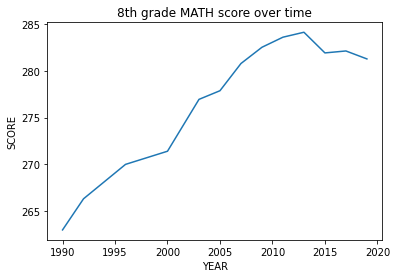

In [17]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade MATH score over time')

**<CAPTION FOR VIZ 1>**

Visualization 2

Text(0, 0.5, '8th grade MATH score')

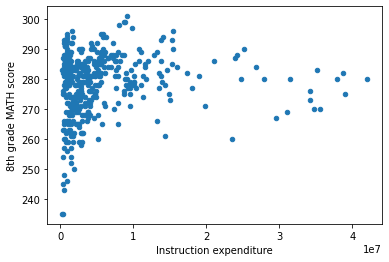

In [18]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE',y='AVG_MATH_8_SCORE')
plt.xlabel('Instruction expenditure')
plt.ylabel('8th grade MATH score')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['TOTAL_REVENUE','8TH','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
# NAEP grade 8 MATH cutoffs: average 266 (what I have assumed)
y = df.loc[X.index]['AVG_MATH_8_SCORE']>266

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<B/CLASSIFICATION>**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# create your model here
model = KNeighborsClassifier(n_neighbors = 5)

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = model.predict(X_test)

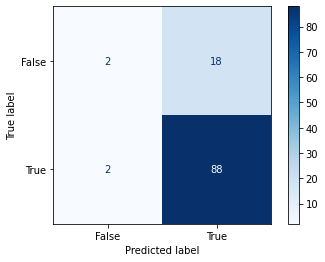

In [26]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [27]:
"""
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

"""

'\n# FOR REGRESSION ONLY: (pick a single column to visualize results)\n\n# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. \n# Instead, look at the error values and individual intercepts.\n\n\ncol_name = ??\ncol_index = X_train.columns.get_loc(col_name)\n\nf = plt.figure(figsize=(12,6))\nplt.scatter(X_train[col_name], y_train, color = "red")\nplt.scatter(X_train[col_name], model.predict(X_train), color = "green")\nplt.scatter(X_test[col_name], model.predict(X_test), color = "blue")\n\nnew_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)\nintercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]\nplt.plot(new_x, intercept+new_x*model.coef_[col_index])\n\nplt.legend([\'controlled model\',\'true training\',\'predicted training\',\'predicted testing\'])\nplt.xlabel(col_name)\nplt.ylabel(??)\n\n'

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [29]:
# accuracy score
accuracy_score(y_test, model.predict(X_test))

0.8181818181818182

In [30]:
# recall / sensitivity
recall_score(y_test, model.predict(X_test))

0.9777777777777777

In [31]:
# precision / specificity
precision_score(y_test, model.predict(X_test))

0.8301886792452831

I made a few choices in this checkpoint

Initially they had kept grade 8 reading, but I changed that grade 8 math. 

They had used the suporting services expenditure but I wanted to change that. So I used
    1. Total Expenditure - This gave an accuracy score at 0.69 at 5 nearest neighbours. 
    2. Instructional Expenditure - This gave an accuracy score of 0.82 at 5 nearest neighbours. 

The threshold was chosen to be 266.
    
The testing size was varied between 0.25 and 0.45. The value of 0.3 resulted in highest accuracy score. 0.25 resulted in overfitting and higher values resulted in poor training. 

5 nearest neighbours resulted in optimal trade-off between precision and recall. Increasing n resulted in overfitting and poor recall. Decreasing n resulted in underfitting and poor precision.